In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu111 (Tesla P100-PCIE-16GB)


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/mask_dset/images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/mask_dset/images/maksssksksss0.png
/content/drive/MyDrive/mask_dset/images/maksssksksss1.png
/content/drive/MyDrive/mask_dset/images/maksssksksss108.png
/content/drive/MyDrive/mask_dset/images/maksssksksss104.png
/content/drive/MyDrive/mask_dset/images/maksssksksss126.png
/content/drive/MyDrive/mask_dset/images/maksssksksss106.png
/content/drive/MyDrive/mask_dset/images/maksssksksss134.png
/content/drive/MyDrive/mask_dset/images/maksssksksss128.png
/content/drive/MyDrive/mask_dset/images/maksssksksss113.png
/content/drive/MyDrive/mask_dset/images/maksssksksss137.png
/content/drive/MyDrive/mask_dset/images/maksssksksss136.png
/content/drive/MyDrive/mask_dset/images/maksssksksss100.png
/content/drive/MyDrive/mask_dset/images/maksssksksss116.png
/content/drive/MyDrive/mask_dset/images/maksssksksss102.png
/content/drive/MyDrive/mask_dset/images/maksssksksss139.png
/content/drive/MyDrive/mask_dset/images/maksssksksss115.png
/content/drive/MyDrive/mask_dset/images/maks

In [ ]:
# os.mkdir("./train_data")
# os.mkdir("./train_data/images")
# os.mkdir("./train_data/labels")
# os.mkdir("./train_data/images/train")
# os.mkdir("./train_data/images/val")
# os.mkdir("./train_data/labels/train")
# os.mkdir("./train_data/labels/val")

In [ ]:
import xml.etree.ElementTree as ET
from xml.dom.minidom import parse



path = "/content/drive/MyDrive/mask_dset/annotations"
classes = {"with_mask":0,"without_mask":1,"mask_weared_incorrect":2}

for annotations in os.listdir(path):
    
    
    dom = parse(os.path.join(path,annotations))
    root = dom.documentElement
    filename = ".txt".join(root.getElementsByTagName("filename")[0].childNodes[0].data.split(".png"))
    
    image_width = root.getElementsByTagName("width")[0].childNodes[0].data
    image_height = root.getElementsByTagName("height")[0].childNodes[0].data
    with open("./train_data/labels/train/"+filename,"w") as r:
        
        for items in root.getElementsByTagName("object") :
            
            name = items.getElementsByTagName("name")[0].childNodes[0].data
            xmin = items.getElementsByTagName("xmin")[0].childNodes[0].data
            ymin = items.getElementsByTagName("ymin")[0].childNodes[0].data
            xmax = items.getElementsByTagName("xmax")[0].childNodes[0].data
            ymax = items.getElementsByTagName("ymax")[0].childNodes[0].data
            x_center_norm = ((int(xmin)+int(xmax)) / 2 ) / int(image_width)
            y_center_norm = ((int(ymin)+int(ymax))/2) / int(image_height)
            width_norm = ((int(xmax)-int(xmin))/int(image_width))
            height_norm = ((int(ymax)-int(ymin))/int(image_height))
            
            r.write(str(classes[name]))
            r.write(" ")
            r.write(str(x_center_norm))
            r.write(" ")
            r.write(str(y_center_norm))
            r.write(" ")
            r.write(str(width_norm))
            r.write(" ")
            r.write(str(height_norm))
            r.write("\n")


In [ ]:
len(os.listdir("./train_data/labels/train/")) == len(os.listdir("/content/train_data/images"))

False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
path = "/content/drive/MyDrive/mask_dset/images"
for images in os.listdir(path):
    image_path = os.path.join(path,images)
    shutil.copy(image_path,"./train_data/images/train/"+images)

In [ ]:
len(os.listdir("./train_data/images/train/")) == len(os.listdir("./train_data/labels/train/"))

True

In [ ]:
from random import shuffle
from glob import glob
import random
import shutil

random.seed(42)
files = glob("./train_data/images/train/*.png")
shuffle(files)
txt_train_path = "./train_data/labels/train/"
img_train_path = "./train_data/images/train/"
txt_val_path = "./train_data/labels/val/"
img_val_path = "./train_data/images/val/"
for i in files[:120]:
    
    
    filename= i.split("/")[-1]
    # print(filename)
    
#     shutil.move(txt_train_path+filename.replace(".png",".txt"),txt_val_path+filename.replace(".png",".txt"))
    shutil.move(txt_train_path+filename.replace(".png",".txt"),txt_val_path)
    f = filename
    # filename = f[6:]
    print(filename)

    shutil.move(img_train_path+filename,img_val_path+filename)

maksssksksss414.png
maksssksksss50.png
maksssksksss143.png
maksssksksss646.png
maksssksksss716.png
maksssksksss714.png
maksssksksss419.png
maksssksksss5.png
maksssksksss240.png
maksssksksss56.png
maksssksksss688.png
maksssksksss315.png
maksssksksss787.png
maksssksksss127.png
maksssksksss805.png
maksssksksss479.png
maksssksksss609.png
maksssksksss785.png
maksssksksss96.png
maksssksksss10.png
maksssksksss42.png
maksssksksss246.png
maksssksksss442.png
maksssksksss565.png
maksssksksss686.png
maksssksksss104.png
maksssksksss453.png
maksssksksss455.png
maksssksksss815.png
maksssksksss274.png
maksssksksss488.png
maksssksksss24.png
maksssksksss542.png
maksssksksss632.png
maksssksksss484.png
maksssksksss447.png
maksssksksss752.png
maksssksksss83.png
maksssksksss205.png
maksssksksss449.png
maksssksksss710.png
maksssksksss313.png
maksssksksss184.png
maksssksksss88.png
maksssksksss439.png
maksssksksss9.png
maksssksksss44.png
maksssksksss676.png
maksssksksss499.png
maksssksksss635.png
maksssksksss1

In [ ]:
len(os.listdir("./train_data/labels/val/")) == len(os.listdir("./train_data/images/val/"))

True

In [ ]:
with open("./data.yaml","w") as f:
    f.write("train: ")
    f.write("/content/train_data/images/train")
    f.write("\n")
    f.write("val: ")
    f.write("/content/train_data/images/val")
    f.write("\n")
    f.write("nc: ")
    f.write(" 3")
    f.write("\n")
    f.write("names: ")
    f.write(" ['with_mask','without_mask','mask_weared_incorrect']")

In [ ]:
with open("./data.yaml","r") as f:
    print(f.read())


train: /content/train_data/images/train
val: /content/train_data/images/val
nc:  3
names:  ['with_mask','without_mask','mask_weared_incorrect']


In [ ]:
!git clone https://github.com/ultralytics/yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 9803, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 9803 (delta 2), reused 4 (delta 0), pack-reused 9793
Receiving objects: 100% (9803/9803), 10.02 MiB | 32.16 MiB/s, done.
Resolving deltas: 100% (6820/6820), done.


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 5.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip uninstall -q -y wandb 


In [ ]:
!python train.py --img 640 --batch 32 --epochs 40 --data ../data.yaml --weights yolov5s.pt --cache 

train: weights=yolov5s.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=40, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-8-g1172ac1 torch 1.9.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scal

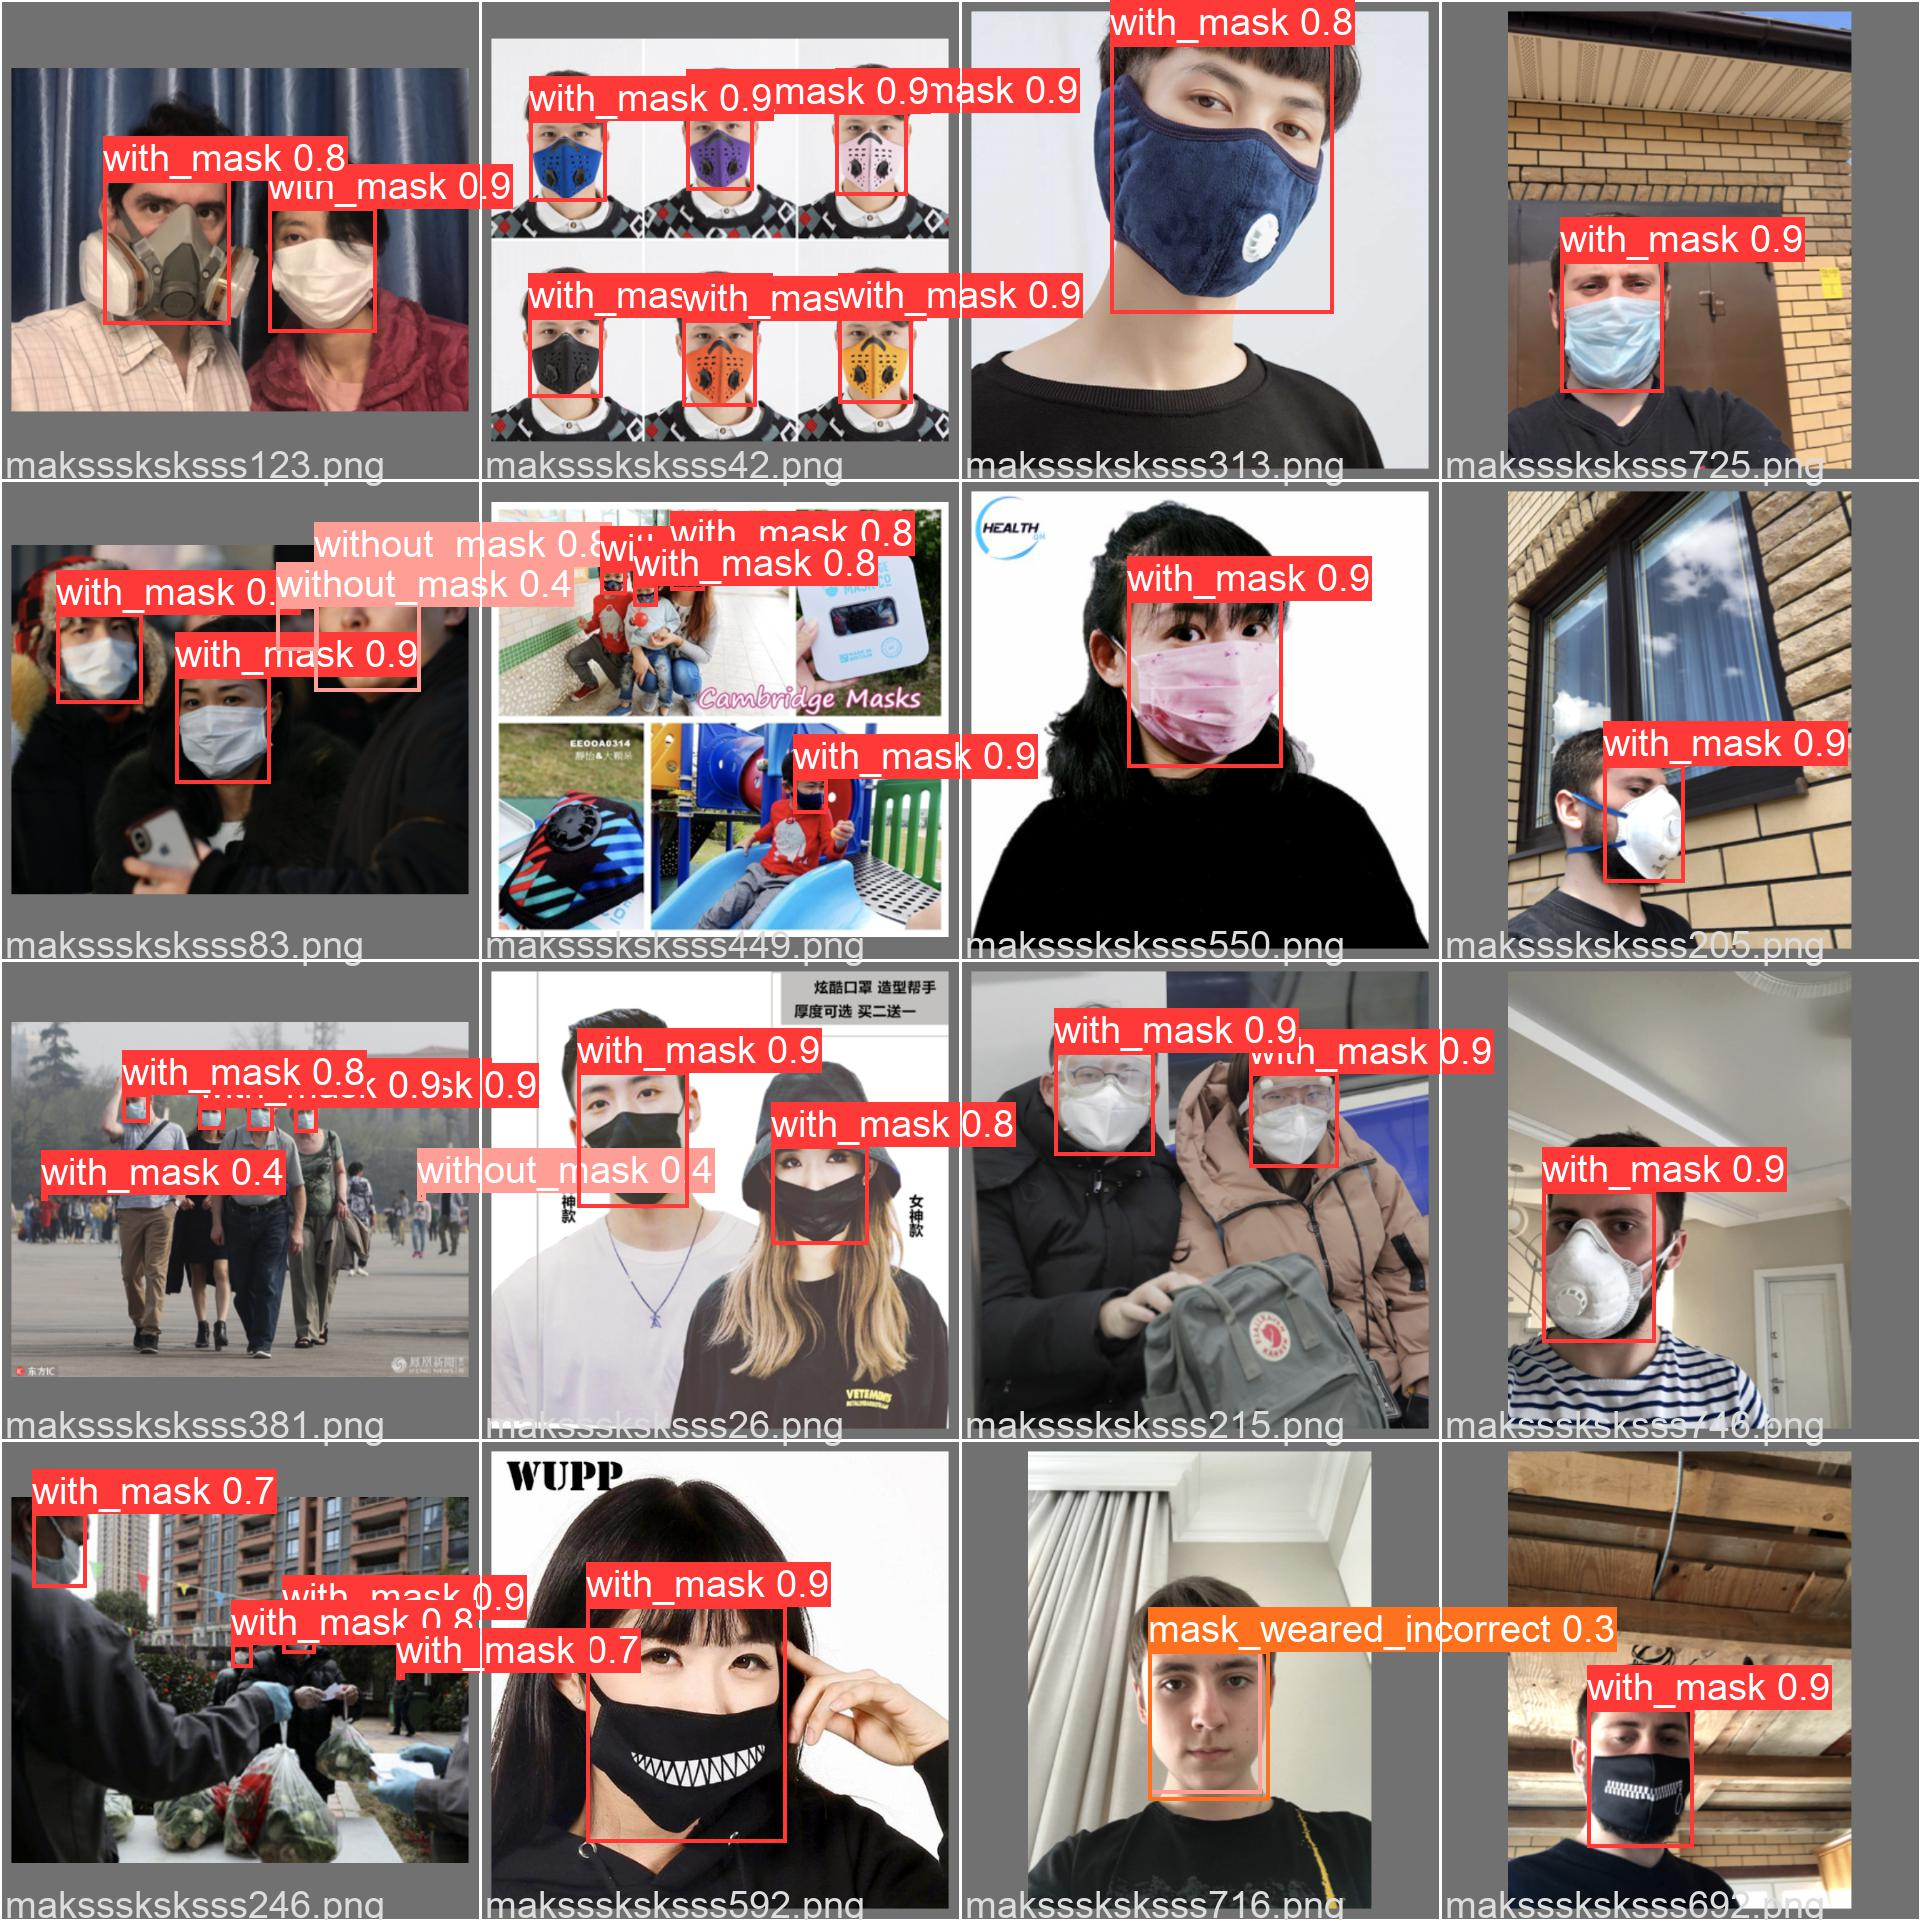

In [ ]:
from IPython.display import Image
Image('/content/yolov5/runs/train/exp/val_batch1_pred.jpg')

In [ ]:
!wget https://images.indianexpress.com/2020/10/AP20275492440361.jpg

--2021-10-14 04:42:00--  https://images.indianexpress.com/2020/10/AP20275492440361.jpg
Resolving images.indianexpress.com (images.indianexpress.com)... 104.127.158.208
Connecting to images.indianexpress.com (images.indianexpress.com)|104.127.158.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147084 (144K) [image/jpeg]
Saving to: ‘AP20275492440361.jpg’

AP20275492440361.jp 100%[===================>] 143.64K  --.-KB/s    in 0.03s   

2021-10-14 04:42:01 (5.20 MB/s) - ‘AP20275492440361.jpg’ saved [147084/147084]



In [ ]:
!python detect.py --source "/content/yolov5/AP20275492440361.jpg" --weights '/content/yolov5/runs/train/exp/weights/best.pt'

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/AP20275492440361.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-8-g1172ac1 torch 1.9.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/AP20275492440361.jpg: 384x640 20 with_masks, 1 without_mask, Done. (0.010s)
Speed: 0.5ms pre-process, 10.1ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


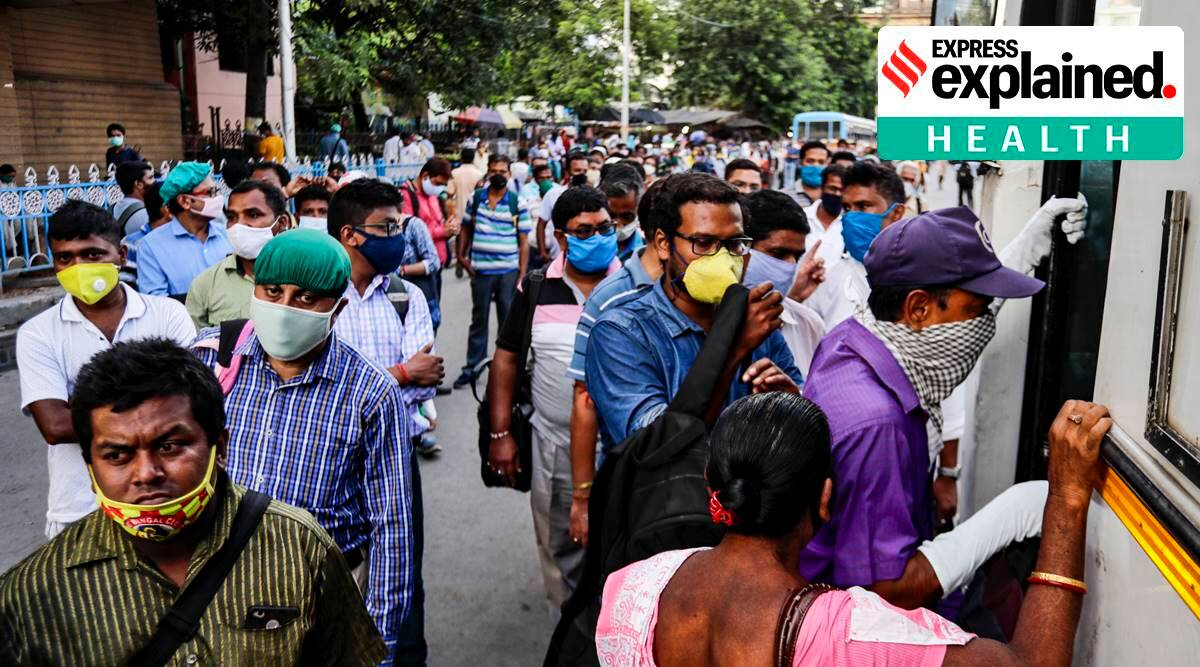

In [ ]:
Image("/content/yolov5/AP20275492440361.jpg")

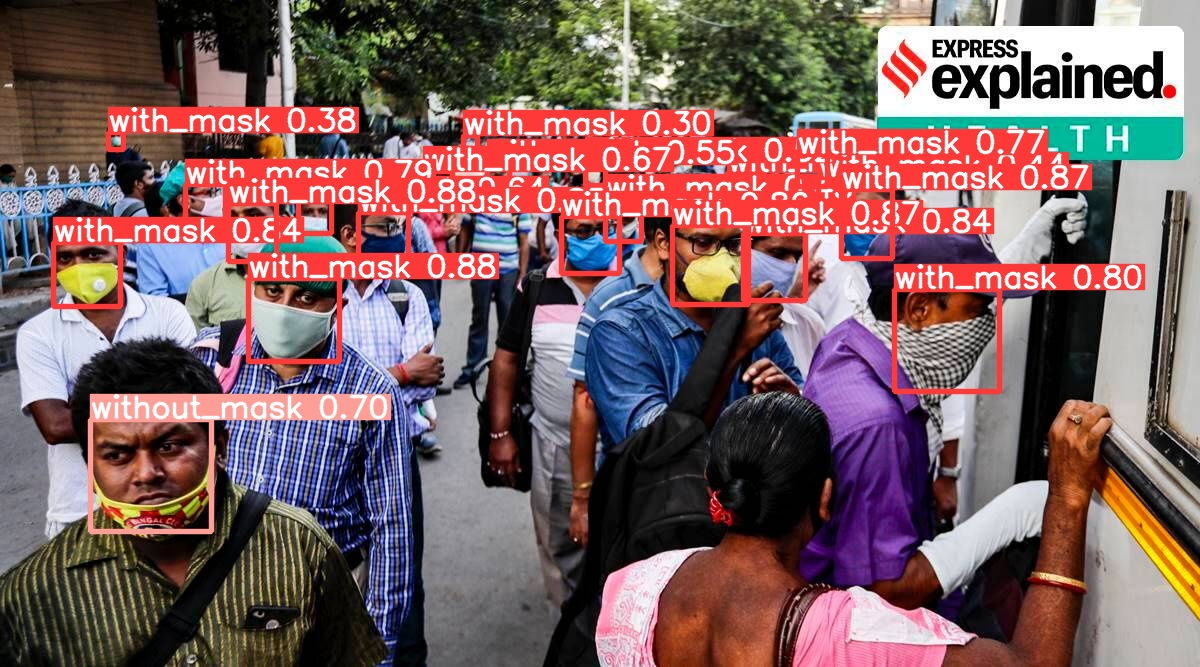

In [ ]:
Image("/content/yolov5/runs/detect/exp/AP20275492440361.jpg")

In [ ]:
!wget https://cdn.britannica.com/q:60/15/215715-050-496D93EB/Women-wearing-facemasks-while-walking-outdoors-Milan-Italy-February-2020-coronavirus-COVID-19.jpg

--2021-10-14 04:53:08--  https://cdn.britannica.com/q:60/15/215715-050-496D93EB/Women-wearing-facemasks-while-walking-outdoors-Milan-Italy-February-2020-coronavirus-COVID-19.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 54.192.181.28, 54.192.181.123, 54.192.181.86, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|54.192.181.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113291 (111K) [image/jpeg]
Saving to: ‘Women-wearing-facemasks-while-walking-outdoors-Milan-Italy-February-2020-coronavirus-COVID-19.jpg’

Women-wearing-facem 100%[===================>] 110.64K   214KB/s    in 0.5s    

2021-10-14 04:53:09 (214 KB/s) - ‘Women-wearing-facemasks-while-walking-outdoors-Milan-Italy-February-2020-coronavirus-COVID-19.jpg’ saved [113291/113291]



In [ ]:
!python detect.py --source "/content/yolov5/Women-wearing-facemasks-while-walking-outdoors-Milan-Italy-February-2020-coronavirus-COVID-19.jpg" --weights '/content/yolov5/runs/train/exp/weights/best.pt'

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/Women-wearing-facemasks-while-walking-outdoors-Milan-Italy-February-2020-coronavirus-COVID-19.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-8-g1172ac1 torch 1.9.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/Women-wearing-facemasks-while-walking-outdoors-Milan-Italy-February-2020-coronavirus-COVID-19.jpg: 448x640 3 with_masks, 1 without_mask, Done. (0.011s)
Speed: 0.5ms pre-process, 10.8ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results 

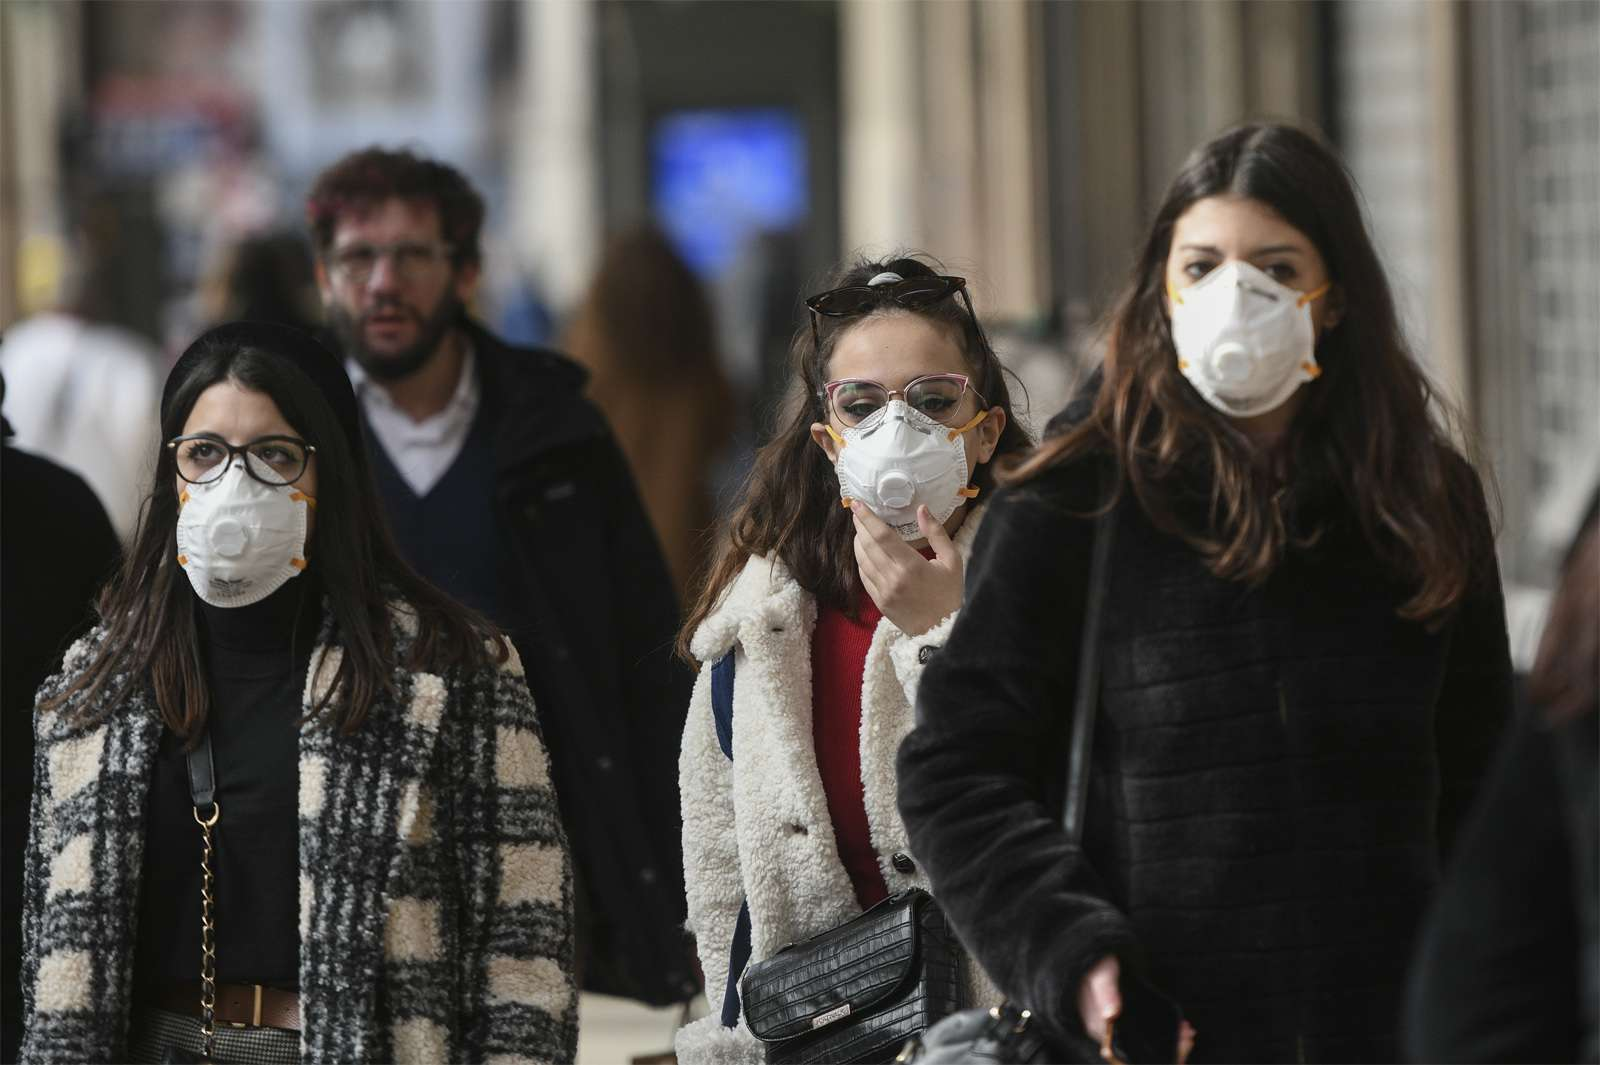

In [ ]:
Image("/content/yolov5/Women-wearing-facemasks-while-walking-outdoors-Milan-Italy-February-2020-coronavirus-COVID-19.jpg")

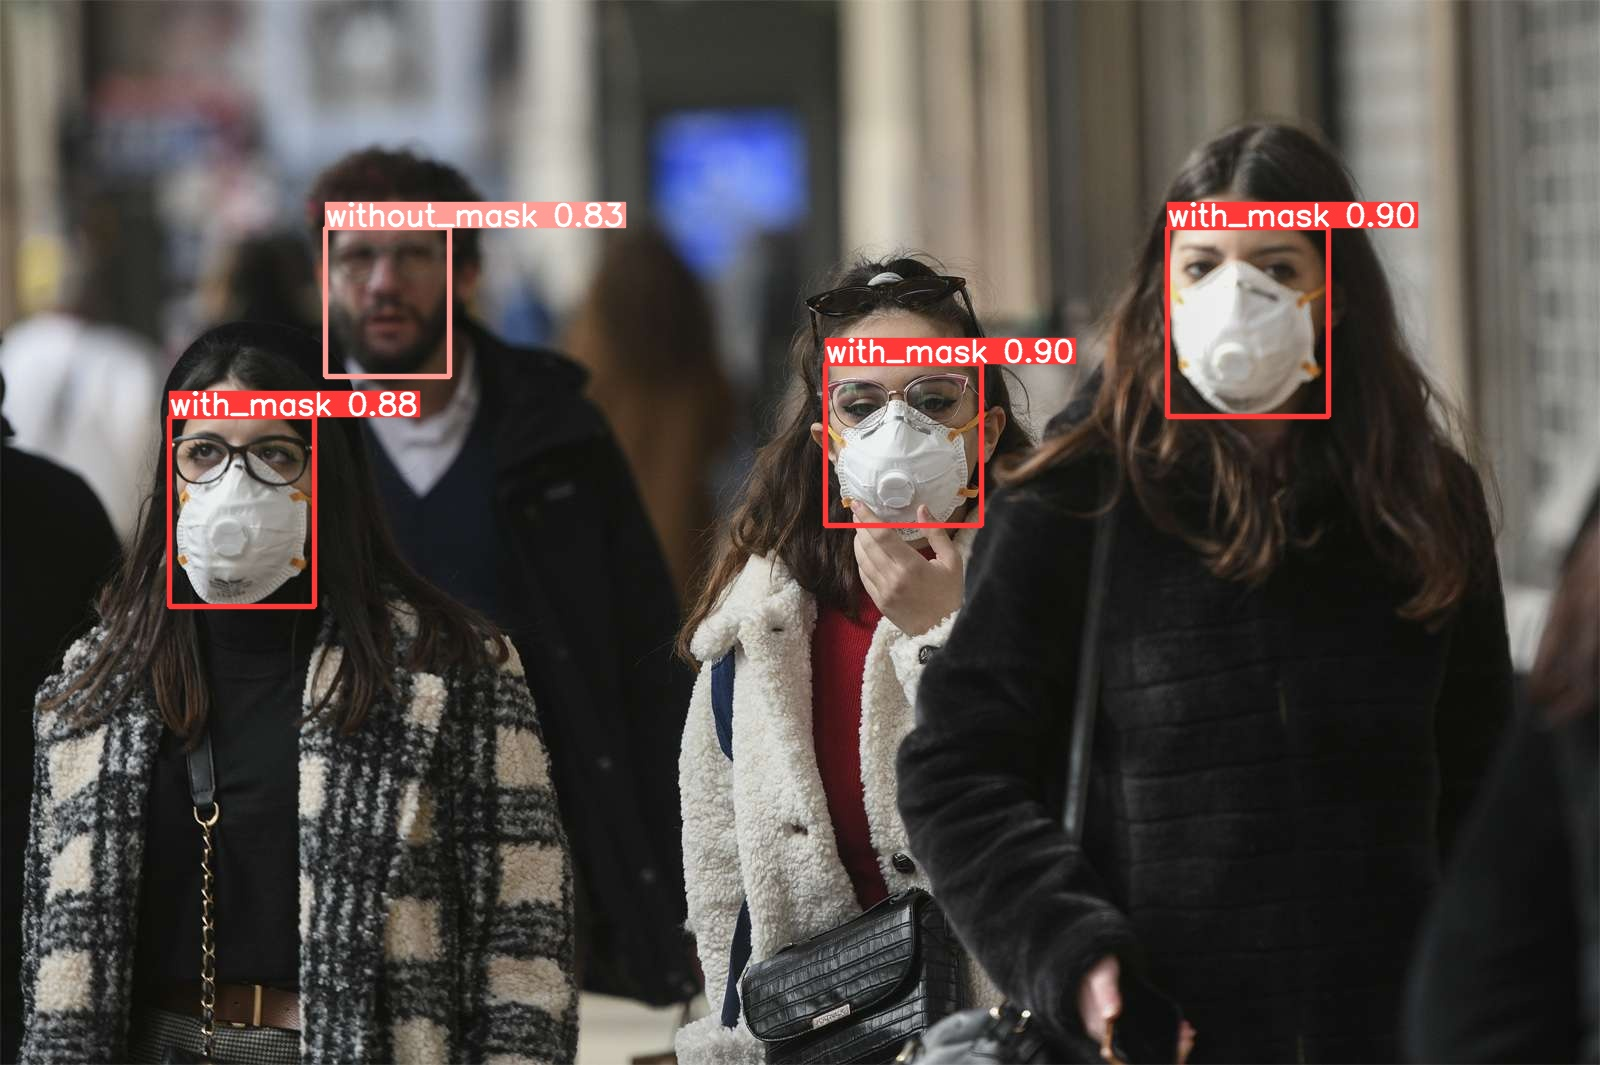

In [ ]:
Image("/content/yolov5/runs/detect/exp2/Women-wearing-facemasks-while-walking-outdoors-Milan-Italy-February-2020-coronavirus-COVID-19.jpg")